In [1]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline

In [10]:
#Exercises 1
E1=(2.75+3.69*1j)*(8.55-6.13*1j)
print('E1 = ', E1)

E2=1.4*numpy.exp(5.32*1j)
print('E2 = ', E2)

E3=(7.51-9.15*1j)/(4.43+9.64*1j)
print('E3 = ', E3)

E1 =  (46.1322+14.692000000000004j)
E2 =  (0.799270785858-1.1494199454j)
E3 =  (-0.4880897698448308-1.0033441577191493j)


In [11]:
#Ecercises 2
def get_zetaplane(R,c,x_c,y_c):
    N=666
    theta=numpy.linspace(0,2*math.pi,N)
    z=(R*numpy.cos(theta)+x_c)+(R*numpy.sin(theta)+y_c)*1j
    zeta=z+c**2/z
    zeta_real=zeta.real
    zeta_imag=zeta.imag
    return zeta_real,zeta_imag
def get_origin(x_c,y_c):
    z_origin=x_c+y_c*1j
    Z_origin=z_origin+c**2/z_origin
    zeta_xorigin=Z_origin.real
    zeta_yorigin=Z_origin.imag
    return zeta_x_origin,zeta_y_origin

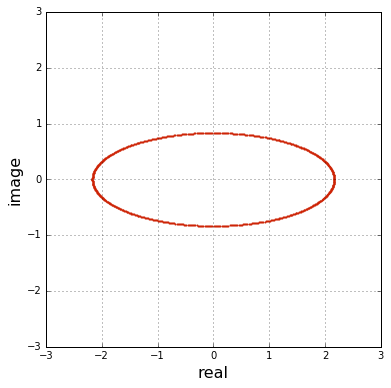

In [40]:
#Ecercises 2.1
c=1
R=1.5
x_c,y_c=0,0
zeta_real,zeta_imag=get_zetaplane(R,c,x_c,y_c)
x=zeta_real
y=zeta_imag
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel('real',fontsize=16)
pyplot.ylabel('image',fontsize=16)
pyplot.xlim(-3,3)
pyplot.ylim(-3,3)
pyplot.scatter(x,y,color='#CD2305', s=1, marker='o');

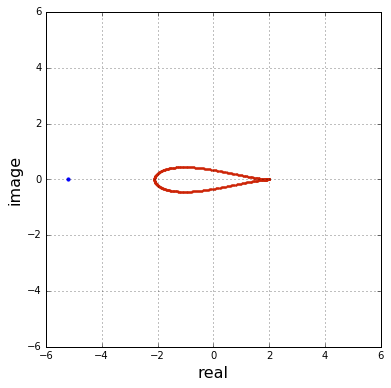

In [41]:
#Ecercises 2.2
c=1
R=1.2
x_c,y_c=c-R,0
zeta_real,zeta_imag=get_zetaplane(R,c,x_c,y_c)
x=zeta_real
y=zeta_imag
zeta_x_origin,zeta_y_origin=get_origin(x_c,y_c)
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel('real',fontsize=16)
pyplot.ylabel('image',fontsize=16)
pyplot.xlim(-6,6)
pyplot.ylim(-6,6)
pyplot.scatter(x,y,color='#CD2305', s=1, marker='o');
pyplot.scatter(zeta_x_origin,zeta_y_origin,color='b',s=10,marker='o');


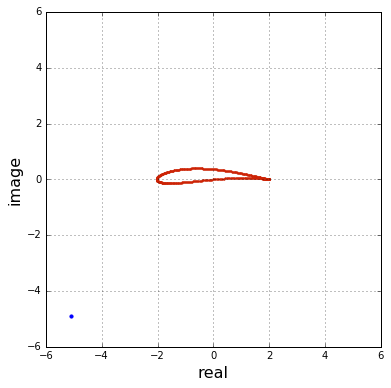

In [42]:
#Ecercises 2.3
x_c,y_c=-0.1,0.1
c=1
R=numpy.sqrt((c-x_c)**2+y_c**2)
zeta_real,zeta_imag=get_zetaplane(R,c,x_c,y_c)
x=zeta_real
y=zeta_imag
zeta_x_origin,zeta_y_origin=get_origin(x_c,y_c)
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel('real',fontsize=16)
pyplot.ylabel('image',fontsize=16)
pyplot.xlim(-6,6)
pyplot.ylim(-6,6)
pyplot.scatter(x,y,color='#CD2305', s=1, marker='o');
pyplot.scatter(zeta_x_origin,zeta_y_origin,color='b',s=10,marker='o');


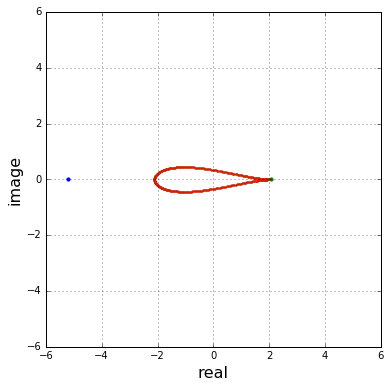

In [43]:
#Ecercises 2.4
c=1
R=1.2
x_c,y_c=c-R,0
zeta_real,zeta_imag=get_zetaplane(R,c,x_c,y_c)
x=zeta_real
y=zeta_imag
zeta_x_origin,zeta_y_origin=get_origin(x_c,y_c)
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel('real',fontsize=16)
pyplot.ylabel('image',fontsize=16)
pyplot.xlim(-6,6)
pyplot.ylim(-6,6)
pyplot.scatter(x,y,color='#CD2305', s=1, marker='o');
pyplot.scatter(zeta_x_origin,zeta_y_origin,color='b',s=10,marker='o');

#find the point of trailing edge
theta_trail= 0
a=numpy.cos(theta_trail)+x_c
b=numpy.sin(theta_trail)+y_c
z=a+b*1j
Z=z+1/z
x_trail=Z.real
y_trail=Z.imag
pyplot.scatter(x_trail,y_trail,color='g',s=10,marker='o');
# From the plot we can see the green point is the trail point 
# When theta is 0,the point corresponds to the trailing edge of the airfoil 

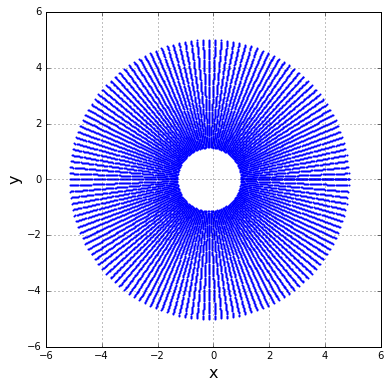

In [55]:
#Exercise 3
x_c,y_c=-0.15,0
R=1.15
c=1
N_r=100
N_theta=145
r=numpy.linspace(R,5,N_r)
theta=numpy.linspace(0,2*math.pi,N_theta)
r_1,theta_1=numpy.meshgrid(r,theta)
x=r_1*numpy.cos(theta_1)+x_c
y=r_1*numpy.sin(theta_1)+y_c
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel('x',fontsize=16)
pyplot.ylabel('y',fontsize=16)
pyplot.xlim(-6,6)
pyplot.ylim(-6,6)
pyplot.scatter(x,y,color='b', s=1, marker='o');